Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

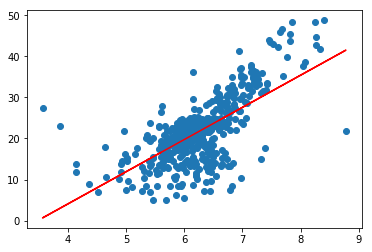

MSE= 28.215949368640796
RMSE= 5.311868726600912
MAE= 3.9489046062737843


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston()#房价数据集,506个对象，每个有13个特征
print(boston.DESCR)
#boston.feature_names
x = boston.data[:,5]#只使用房间数量这个特征
y = boston.target#房价
#plt.scatter(x,y)
#plt.show()

#房价大于等于50万一律用50万，可能在调查问卷时选项问题，要删除这些点
x = x[y<50.]
y = y[y<50.]
plt.scatter(x,y)

#数据分类
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=666)

#计算线性回归值
import sys#引用不在一个文件夹中的.py文件
sys.path.append(r'C:\Users\TH\Desktop\ML\Pycharm\SimpleLinearRegression')
from SimpleLinearRegression2 import SimpleLinearRegression_2
reg = SimpleLinearRegression_2()
reg.fit(x_train,y_train)
print('y=',reg.a_,'x+',reg.b_)

#输出结果并预测

plt.plot(x_train,reg.predict(x_train),color='r')
plt.show()
y_predict = reg.predict(x_test)


#MSE
MSE = np.sum((y_predict-y_test)**2)/len(y_test)
print("MSE=",MSE)

#rmse
from math import sqrt
RMSE = sqrt(MSE)
print("RMSE=",RMSE)

#MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print("MAE=",MAE)

In [8]:
#自己写的函数
import sys#引用不在一个文件夹中的.py文件
sys.path.append(r'C:\Users\TH\Desktop\ML\Pycharm\SimpleLinearRegression')
from metrics import MSE
from metrics import MAE
from metrics import RMSE

mae = MAE(y_test,y_predict)
mse = MSE(y_test,y_predict)
rmse = RMSE(y_test,y_predict)
print("MSE=",mse)
print("RMSE=",rmse)
print("MAE=",mae)

MSE= 28.215949368640796
RMSE= 5.311868726600912
MAE= 3.9489046062737843


In [9]:
#scikit_learn中的MSE MAE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error#无RMSE，需手动开根

MAE = mean_absolute_error(y_test,y_predict)
MSE = mean_squared_error(y_test,y_predict)
print("MSE=",mse)

print("MAE=",mae)

MSE= 28.215949368640796
MAE= 3.9489046062737843
